## Dataset 1:

In [2]:
import pandas as pd
import numpy as np

In [13]:
raw_data = {'User ID': ['User 1', 
                        'User 2', 
                        'User 3', 
                        'User 4', 
                        'User 5'], 
        'Sport': [2, 
                  2, 
                  2, 
                  2, 
                  2], 
        'Religious': [77, 
                      62, 
                      50, 
                      68, 
                      98], 
        'Nature': [79, 
                   76, 
                   97, 
                   77, 
                   54],
        'Theater': [69, 
                    76, 
                    87, 
                    95, 
                    59],
        'Shopping': [68, 
                     69, 
                     50, 
                     76, 
                     95],
        'Picnic': [95, 
                   68, 
                   75, 
                   61, 
                   86]}
df = pd.DataFrame(raw_data, columns = ['User ID', 
                                       'Sport', 
                                       'Religious', 
                                       'Nature', 
                                       'Theater', 
                                       'Shopping', 
                                       'Picnic'])
df

,User ID,Sport,Religious,Nature,Theater,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [47]:
df.to_csv('Destination Reviews.csv')

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Destination%20Reviews.csv', 
                 index_col = 0)
#df

In [50]:
formatted_df = pd.melt(df,
                       ['User ID'], 
                       var_name = 'Class',
                       value_name = 'Reviews')
formatted_df = formatted_df.sort_values(by = ['Class', 'Reviews']).set_index(['User ID','Class'], inplace=False)
formatted_df

,,Reviews
User ID,Class,
User 5,Nature,54
User 2,Nature,76
User 4,Nature,77
User 1,Nature,79
User 3,Nature,97
User 4,Picnic,61
User 2,Picnic,68
User 3,Picnic,75
User 5,Picnic,86


### 1. We can analyze which class among the six has the highest frequency of reviews by the users

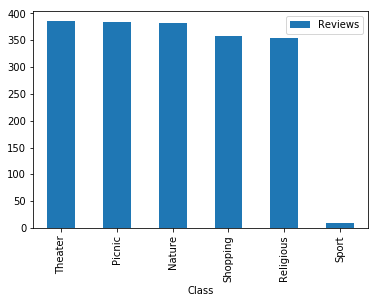

In [46]:
classplot = formatted_df.groupby(['Class']).sum().sort_values(by = ['Reviews'], ascending = False).plot.bar()
classplot

Answer: Based off the bar plot, it seems that Theater has the highest frequency of reviews by users

## Dataset 2:

In [1]:
import pandas as pd
import numpy as np

In [92]:
raw_data = {'Name': ['Reggie Miller', 
                     'Dan Bonner', 
                     'Steve Smith', 
                     'Charles Barkey', 
                     'Kenny Smith',
                     'Chris Webber',
                     'Jalen Rose',
                     'Jim Jackson'], 
        'Test 1': [97, 
                   76, 
                   84, 
                   '', 
                   80, 
                   75, 
                   80, 
                   92], 
        'Test 2': [80, 
                   68, 
                   75, 
                   89, 
                   81,
                   75,
                   85,
                   91], 
        'Test 3': [87, 
                   80, 
                   '', 
                   '', 
                   79,
                   76,
                   84,
                   94],
        'Test 4': [91, 
                   81, 
                   86, 
                   76, 
                   85,
                   92,
                   83,
                   95]}
df = pd.DataFrame(raw_data, columns = ['Name', 
                                       'Test 1', 
                                       'Test 2', 
                                       'Test 3', 
                                       'Test 4'])
df

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97,80,87,91
1,Dan Bonner,76,68,80,81
2,Steve Smith,84,75,,86
3,Charles Barkey,,89,,76
4,Kenny Smith,80,81,79,85
5,Chris Webber,75,75,76,92
6,Jalen Rose,80,85,84,83
7,Jim Jackson,92,91,94,95


In [93]:
df.to_csv('Test Grades.csv')

In [94]:
df = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Test%20Grades.csv', 
                 index_col = 0)
df

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkey,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


In [95]:
formatted_df = (pd.melt(df,
                       ['Name'], 
                       var_name = 'Test',
                       value_name = 'Score').sort_values(by = ['Test','Name','Score']).set_index(['Test','Name']).fillna(0))
formatted_df = formatted_df.astype('int64', copy=False)
formatted_df.dtypes

Score    int64
dtype: object

### 1. Which student had the highest average test grades?

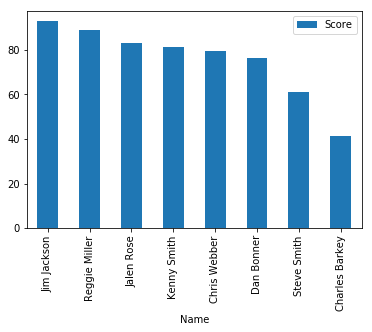

In [96]:
meanscore = formatted_df.groupby('Name').Score.mean().to_frame()
meanscore = meanscore.sort_values(by = ['Score'], ascending = False).plot.bar()

Answer: Jim Jackson had the highest average test grades

### 2. Which student had the greatest range of test grades?

In [97]:
formatted_df['max'] = formatted_df.groupby('Name').Score.max().to_frame()
#.astype('int64', copy=False).sort_values(by = ['Score'], ascending = False)
score



Score  range
Test   Name                        
Test 1 Charles Barkey    0.0    NaN
       Chris Webber     75.0    NaN
       Dan Bonner       76.0    NaN
       Jalen Rose       80.0    NaN
       Jim Jackson      92.0    NaN
       Kenny Smith      80.0    NaN
       Reggie Miller    97.0    NaN
       Steve Smith      84.0    NaN
Test 2 Charles Barkey   89.0    NaN
       Chris Webber     75.0    NaN
       Dan Bonner       68.0    NaN
       Jalen Rose       85.0    NaN
       Jim Jackson      91.0    NaN
       Kenny Smith      81.0    NaN
       Reggie Miller    80.0    NaN
       Steve Smith      75.0    NaN
Test 3 Charles Barkey    0.0    NaN
       Chris Webber     76.0    NaN
       Dan Bonner       80.0    NaN
       Jalen Rose       84.0    NaN
       Jim Jackson      94.0    NaN
       Kenny Smith      79.0    NaN
       Reggie Miller    87.0    NaN
       Steve Smith       0.0    NaN
Test 4 Charles Barkey   76.0    NaN
       Chris Webber     92.0    NaN
       Dan Bonner       81.0    NaN
       Jalen Rose       83.0    NaN
       Jim Jackson      95.0    NaN
       Kenny Smith      85.0    NaN
       Reggie Miller    91.0    NaN
       Steve Smith      86.0    NaN

In [98]:
score['min'] = formatted_df.groupby('Name').Score.min().to_frame().astype('int64', copy=False).sort_values(by = ['Score'], ascending = False)
score

Score  range  min
Test   Name                             
Test 1 Charles Barkey    0.0    NaN  NaN
       Chris Webber     75.0    NaN  NaN
       Dan Bonner       76.0    NaN  NaN
       Jalen Rose       80.0    NaN  NaN
       Jim Jackson      92.0    NaN  NaN
       Kenny Smith      80.0    NaN  NaN
       Reggie Miller    97.0    NaN  NaN
       Steve Smith      84.0    NaN  NaN
Test 2 Charles Barkey   89.0    NaN  NaN
       Chris Webber     75.0    NaN  NaN
       Dan Bonner       68.0    NaN  NaN
       Jalen Rose       85.0    NaN  NaN
       Jim Jackson      91.0    NaN  NaN
       Kenny Smith      81.0    NaN  NaN
       Reggie Miller    80.0    NaN  NaN
       Steve Smith      75.0    NaN  NaN
Test 3 Charles Barkey    0.0    NaN  NaN
       Chris Webber     76.0    NaN  NaN
       Dan Bonner       80.0    NaN  NaN
       Jalen Rose       84.0    NaN  NaN
       Jim Jackson      94.0    NaN  NaN
       Kenny Smith      79.0    NaN  NaN
       Reggie Miller    87.0    NaN  NaN
       Steve Smith       0.0    NaN  NaN
Test 4 Charles Barkey   76.0    NaN  NaN
       Chris Webber     92.0    NaN  NaN
       Dan Bonner       81.0    NaN  NaN
       Jalen Rose       83.0    NaN  NaN
       Jim Jackson      95.0    NaN  NaN
       Kenny Smith      85.0    NaN  NaN
       Reggie Miller    91.0    NaN  NaN
       Steve Smith      86.0    NaN  NaN

In [99]:
score['range'] = score["max"] - score["min"]
score = score.drop(columns=['max', 'min'])

KeyError: 'max'

In [100]:
score.sort_values(by = ['range'], ascending = False)

Score  range  min
Test   Name                             
Test 1 Charles Barkey    0.0    NaN  NaN
       Chris Webber     75.0    NaN  NaN
       Dan Bonner       76.0    NaN  NaN
       Jalen Rose       80.0    NaN  NaN
       Jim Jackson      92.0    NaN  NaN
       Kenny Smith      80.0    NaN  NaN
       Reggie Miller    97.0    NaN  NaN
       Steve Smith      84.0    NaN  NaN
Test 2 Charles Barkey   89.0    NaN  NaN
       Chris Webber     75.0    NaN  NaN
       Dan Bonner       68.0    NaN  NaN
       Jalen Rose       85.0    NaN  NaN
       Jim Jackson      91.0    NaN  NaN
       Kenny Smith      81.0    NaN  NaN
       Reggie Miller    80.0    NaN  NaN
       Steve Smith      75.0    NaN  NaN
Test 3 Charles Barkey    0.0    NaN  NaN
       Chris Webber     76.0    NaN  NaN
       Dan Bonner       80.0    NaN  NaN
       Jalen Rose       84.0    NaN  NaN
       Jim Jackson      94.0    NaN  NaN
       Kenny Smith      79.0    NaN  NaN
       Reggie Miller    87.0    NaN  NaN
       Steve Smith       0.0    NaN  NaN
Test 4 Charles Barkey   76.0    NaN  NaN
       Chris Webber     92.0    NaN  NaN
       Dan Bonner       81.0    NaN  NaN
       Jalen Rose       83.0    NaN  NaN
       Jim Jackson      95.0    NaN  NaN
       Kenny Smith      85.0    NaN  NaN
       Reggie Miller    91.0    NaN  NaN
       Steve Smith      86.0    NaN  NaN

Answer: Charles Barkey had the highest range since his missing test scores counted as Zeros. When Charles is able to take care of the missing test socres perhaps his range wont be the highest.

### 3. Which test had the highest grades?

In [101]:
hightest = formatted_df.groupby('Test').max().sort_values(by = ['Score'], ascending = False)
hightest

,Score,max
Test,,
Test 1,97,NaN
Test 4,95,NaN
Test 3,94,NaN
Test 2,91,NaN


Answer: The test that had the highest overall grade was test 1, where Reggie Miller scored a 97.

## Dataset 3:

In [102]:
import pandas as pd
import numpy as np

In [103]:
raw_data = {'Unique ID of the institution': [100654,
                                             100654,
                                             100663,
                                             100663,
                                             100690,
                                             100690,
                                             100706,
                                             100706], 
            'Level of student': ['Undergraduate',
                                 'Graduate',
                                 'Undergraduate',
                                 'Graduate',
                                 'Undergraduate',
                                 'Graduate',
                                 'Undergraduate',
                                 'Graduate'], 
            'American Indian or Alaska Native': [11,
                                                 4,
                                                 36,
                                                 26,
                                                 0,
                                                 2,
                                                 90,
                                                 23], 
            'Asian': [12,
                      11,
                      743,
                      471,
                      2,
                      1,
                      304,
                      71],
            'Black or African American': [4742,
                                          961,
                                          3497,
                                          1550,
                                          195,
                                          152,
                                          813,
                                          202],
            'Hispanic or Latino': [36,
                                   7,
                                   429,
                                   289,
                                   44,
                                   43,
                                   313,
                                   64],
            'Native Hawaiian or Other Pacific Islander': [10,
                                                          1,
                                                          4,
                                                          11,
                                                          1,
                                                          4,
                                                          3,
                                                          0],
           'White': [137,
                     151,
                     7515,
                     6437,
                     66,
                     93,
                     5055,
                     1518],
           'Two or more races': [210,
                                 14,
                                 522,
                                 269,
                                 0,
                                 0,
                                 129,
                                 20],
           'Race/ethnicity unknown': [11,
                                      3,
                                      198,
                                      176,
                                      123,
                                      142,
                                      595,
                                      115],
           'Nonresident alien': [38,
                                 33,
                                 364,
                                 659,
                                 0,
                                 0,
                                 217,
                                 365],}
df = pd.DataFrame(raw_data, columns = ['Unique ID of the institution', 
                                       'Level of student', 
                                       'American Indian or Alaska Native', 
                                       'Asian', 
                                       'Black or African American',
                                       'Hispanic or Latino',
                                       'Native Hawaiian or Other Pacific Islander',
                                       'White',
                                       'Two or more races',
                                       'Race/ethnicity unknown',
                                       'Nonresident alien'])
df

,Unique ID of the institution,Level of student,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,26,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0
5,100690,Graduate,2,1,152,43,4,93,0,142,0
6,100706,Undergraduate,90,304,813,313,3,5055,129,595,217
7,100706,Graduate,23,71,202,64,0,1518,20,115,365


In [104]:
df.to_csv('Student Enrollments.csv', header = True )

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Student%20Enrollments.csv', 
                 index_col = 0)
#df

In [106]:
formatted_df = pd.melt(df,
                       ['Level of student','Unique ID of the institution'], 
                       var_name = 'Ethnicity',
                       value_name = 'Number of Students')
formatted_df = formatted_df.sort_values(by = ['Level of student'])

formatted_df.set_index(['Level of student',
                        'Ethnicity',
                        'Unique ID of the institution'
                        ], inplace=True)
formatted_df.head()

Number of Students
Level of student Ethnicity                                 Unique ID of the institution                    
Graduate         Native Hawaiian or Other Pacific Islander 100663                                        11
                 Hispanic or Latino                        100690                                        43
                                                           100706                                        64
                 Native Hawaiian or Other Pacific Islander 100654                                         1
                                                           100690                                         4

### 1. We can analyze the enrollment on different ethnicity by the level

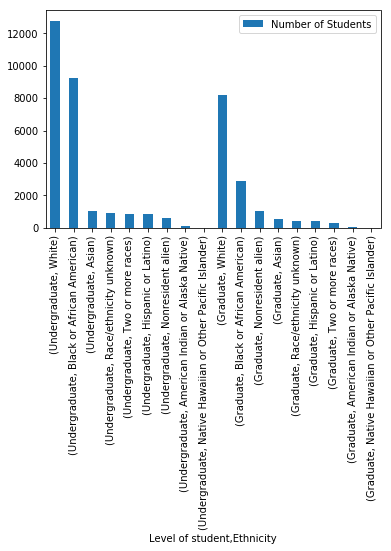

In [80]:
#formatted_df.groupby(['Level of student','Ethnicity']).sum().sort_values(by = ['Number of Students'], ascending = False).plot.bar()
formatted_df.groupby(['Level of student','Ethnicity']).sum().sort_values(by = ['Level of student','Number of Students'], ascending = False).plot.bar()


Answer: Whites have the majority of enrollment in all levels followed by African American.

### 2. Compare different institutions’ enrollment by ethnicity.

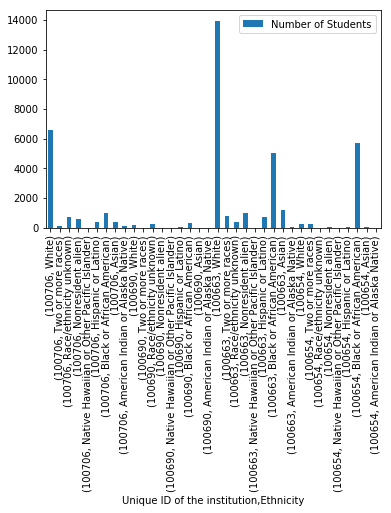

In [81]:
formatted_df.groupby(['Unique ID of the institution', 'Ethnicity']).sum().sort_values(by = ['Unique ID of the institution','Ethnicity', 'Number of Students'], ascending = False).plot.bar()

Answer: It appears that institution 100663 has the hgihest enrollment, with whites being the highest ethnicity. The institution should try to diversify their enrollment in order to reach out to new ethnicities.